In [3]:
import numpy as np

def math_var(X):
    X=np.float64(X)
    X2=X*X
    EX_2=(sum(X)/X.shape[0])**2
    E_X2=sum(X2)/X2.shape[0]
    return E_X2-EX_2

def math_cov(x,y):
    x=np.float64(x)
    y=np.float64(y)
    xy=x*y
    Ex=sum(x)/x.shape[0]
    Ey=sum(y)/y.shape[0]
    Exy=sum(xy)/xy.shape[0]
    return Exy-Ex*Ey

def math_cov_vector(X,Y):
    

#math_var(np.array([13,23,12,44,55]))
math_cov(np.array([10,24,33,54,10]),np.array([5,20,40,80,100]) )


150.20000000000005

In [24]:
# -*- encoding:utf-8 -*-
import math
def y(x):
    return x**2-2*x

def y_d(x):
    return 2*x-2

def gradient_descent(s):
    """
    梯度下降方法
    """ 
    lamda=0.5
    v_min=0
    x_min=s
    for T in range(1,100):
        
        y_t=y(s)
        y_d_t=y_d(s)
        print s,y_t,y_d_t
        if abs(y_d_t) < 0.0001:
            x_min=s
            v_min=y_t
            print abs(y_d_t)
            break
        else:
            x_min=s
            v_min=y_t
            s=s+lamda/T*(0-y_d_t)
    return x_min,v_min
gradient_descent(130.3)

130.3 16717.49 258.6
1.0 -1.0 0.0
0.0


(1.0, -1.0)

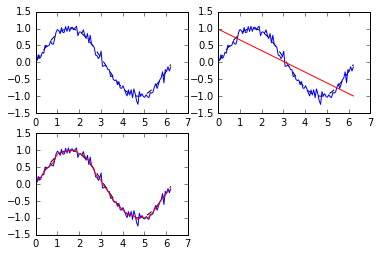

In [217]:
# -*- encopding:utf-8 -*-
"""
多项式拟合的例子
"""
%matplotlib inline
import numpy as np
import math
import random

def get_sample(n,sigma):
    """
    n输出的样例数,sigma高斯方差
    """
    xx=[]
    yy=[]
    r_yy=[]
    for x in range(1,n):
        x=float(x)/n*6.28
        y=math.sin(x)+random.gauss(0,sigma)
        xx.append(x)
        yy.append(y)
        r_yy.append(math.sin(x))
    xx=np.array(xx)
    yy=np.array(yy)
    r_yy=np.array(r_yy)
    return xx,yy,r_yy

def get_X(x,M):
    X=np.empty((M,x.shape[0]))
    #print X
    X[0]=1
    X[1]=x
    for m in range(2,M):
        X[m]=x**m
    #print X
    X=np.transpose(X)
    #print X
    return X
    
    

def get_Err_squre(X,w,y):
    """
    计算均方误差
    """
    err=np.dot(X,w.reshape(w.shape[0],1))-y.reshape(y.shape[0],1)
    #print err
    err_2=err*err
    #print err_2
    return 0.5*sum(err_2)

def get_Err_dev(X,w,y):
    err=np.dot(X,w.reshape(w.shape[0],1))-y.reshape(y.shape[0],1)
    #print X
    #print err
    #print X*err
    return np.sum(X*err,axis=0)


def gredient(x,y):
    
    X=get_X(x,2)
    W_k=ones(X.shape[1])
    W_k=W_k*0.01
    MAX_ITR = 100
    lamda=0.1
    ret_W=[]
    mse=0
    for i in range(1,MAX_ITR):
        print u'迭代次数',i
        print X
        print W_k
        print y
        Err=get_Err_squre(X,W_k,y)
        Err_dev=get_Err_dev(X,W_k,y)# 求导数
        print u'导数',Err_dev
        print u'误差',Err
        mse=Err
        W_k =W_k-lamda/i*Err_dev-0.5*W_k
        #print W_k
        predict_y=np.dot(X,W_k.reshape(W_k.shape[0],1))
        #print predict_y
        if(Err<0.0001): #判断误差
            break
    else:
        print 'error'
    predict_y=predict_y.reshape(predict_y.shape[0])  
    return predict_y,mse,Err

def standRegres(xArr,yArr):
    """
    xAr为二维数组
    yArr为一维数组
    标准线性回归
    返回参数ws和预测值一维数组
    """
    xMat=np.mat(xArr)
    yArr=yArr.reshape(yArr.shape[0],1)
    yMat=np.mat(yArr)
    xTx=xMat.T*xMat
    if np.linalg.det(xTx)==0.0:
        print 'singular'
        return 
    ws=xTx.I*(xMat.T*yMat)
    y_p=np.array(xMat*ws)
    y_p=y_p.reshape(y_p.shape[0])
    return ws,y_p
            
def lwlr(testPoint, xArr,yArr,k=1.0):
    # n*M M为特征数量，n为样本点数
    xMat=np.mat(xArr)
    # 转换 n*1
    yMat=np.mat(yArr).T
    m=xMat.shape[0] # 样本数
    weights=np.mat(np.eye(m))
    for j in range(m):
        diffMat=testPoint-xMat[j,:]
        #print diffMat
        weights[j,j]=exp(diffMat*diffMat.T/(-2.0*k**2))
    #print weights
    xTx=xMat.T*(weights*xMat)
    if np.linalg.det(xTx)==0.0:
        print u'奇异矩阵，做不到。。。'
        #return
        xTx=xTx+0.001*np.eye(xTx.shape[0])
    ws=xTx.I*(xMat.T*(weights*yMat))
    return testPoint*ws

def lwlrTest(testArr,xArr,yArr,k=1.0):
    m=testArr.shape[0]
    yHat=zeros(m)
    for i in range(m):
        yHat[i]=lwlr(testArr[i],xArr,yArr,k)
    return yHat

   

x,y,r_y=get_sample(100,0.1)
#p_y,mse,Err=gredient(x,y)
X=get_X(x,2)
ws,y_p=standRegres(X,y)
y_p_local=lwlrTest(X,X,y,0.1)
#print p_y.shape
fig=plt.gcf()
ax1=fig.add_subplot(2,2,1)
ax1.plot(x,r_y,'k--')
ax1.plot(x,y)
ax2=fig.add_subplot(2,2,2)
ax2.plot(x,r_y,'k--')
ax2.plot(x,y)
ax2.plot(x,y_p,'r-')
ax3=fig.add_subplot(2,2,3)
ax3.plot(x,r_y,'k--')
ax3.plot(x,y)
ax3.plot(x,y_p_local,'r-')
#print get_X(np.array([1.0,2.0]),5)
#print get_Err_squre(np.array([[1,1],[1,2]]),np.array([1,1]),np.array([1,4]))
#print get_Err_dev(np.array([[1,1],[1,2]]),np.array([1,1]),np.array([1,4]))

In [208]:
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [184]:
y=np.array([1,2])
y=np.mat(y).T
print y.shape
eye((10)).shape

(2L, 1L)


(10L, 10L)

In [78]:
 
a = np.array([[1, 2], [3, 4]])
b = np.array([2,3])

b=b.reshape(2,1)
print a
print b
np.dot(a, b)
a*b

[[1 2]
 [3 4]]
[[2]
 [3]]


array([[ 2,  4],
       [ 9, 12]])

ValueError: shapes (3,3) and (2,) not aligned: 3 (dim 1) != 2 (dim 0)